In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats

In [2]:
def Solve_RK4(t, X_initial, func_ODEs, h):
    n = t.shape[0]
    X = X_initial

    for i in range(n-1):
        
        midt = t[i] + 0.5*h

        k1 = func_ODEs(t[i], X)

        midX1 = X + k1*0.5*h
        k2 = func_ODEs(midt, midX1)

        midX2 = X + k2*0.5*h
        k3 = func_ODEs(midt, midX2)

        X3 = X + k3*h
        k4 = func_ODEs(t[i+1], X3)

        X = X + (k1 + 2*k2 + 2*k3 + k4)*h/6

    return X

def func_ODEs(t, X):
    x = X[0, :]
    rho = X[1, :]
    dx_dt = x - x**3
    drho_dt = -rho*(1 - 3*x**2)
    ODEs = np.array([dx_dt, drho_dt])

    return ODEs

def PDF(x, mu, std):
    return stats.norm(mu, std).pdf(x)

In [3]:
mu = 0
sigma = 1

t = np.linspace(0, 2, 10001)
x_ini = np.arange(-np.pi, np.pi+0.01, 0.01)
xx_ini, tt = np.meshgrid(x_ini, t)
rho_ini = PDF(xx_ini, mu, sigma)

h = t[1] - t[0]
n = 11
nt = t.shape[0]
m = x_ini.shape[0]

x_exact = xx_ini*np.exp(tt)*(1 - xx_ini**2 + (xx_ini**2)*np.exp(2*tt))**(-1/2)
rho_exact = rho_ini * (xx_ini - xx_ini**3) / (x_exact - x_exact**3)
x_nume = np.zeros((n, m))
rho_nume = np.zeros((n, m))

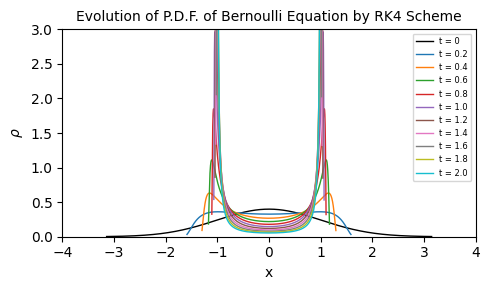

In [20]:
x_nume[0, :] = x_ini
rho_nume[0, :] = rho_ini[0, :]
ini_array = np.array([x_ini, rho_ini[0, :]])

plt.figure(figsize=(5, 3))
plt.plot(x_nume[0, :], rho_nume[0, :], color='k', lw=1, label='t = 0')
for i in range(n-1):
    x_nume[i+1, :] = Solve_RK4(t[int(i*nt/10):int((i+1)*nt/10)], ini_array, func_ODEs, h)[0, :]
    rho_nume[i+1, :] = Solve_RK4(t[int(i*nt/10):int((i+1)*nt/10)], ini_array, func_ODEs, h)[1, :]
    ini_array = np.array([x_nume[i+1, :], rho_nume[i+1, :]])
    plt.plot(x_nume[i+1, :], rho_nume[i+1, :], lw=1, label='t = %.1f' %(0.2*(i+1)))

plt.xticks(np.linspace(-4, 4, 9))
#plt.yticks()
plt.xlim([-4, 4])
plt.ylim([0, 3])
plt.xlabel('x', fontsize=10)
plt.ylabel(r'$\rho$', fontsize=10)
plt.title('Evolution of P.D.F. of Bernoulli Equation by RK4 Scheme', fontsize=10)
plt.legend(loc='upper right', fontsize=6)

plt.tight_layout()
plt.savefig('Bernoulli_rho_RK4.png', dpi=500)
plt.show()

C:\Users\kylec\AppData\Local\Temp\ipykernel_24284\2118239238.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=10)


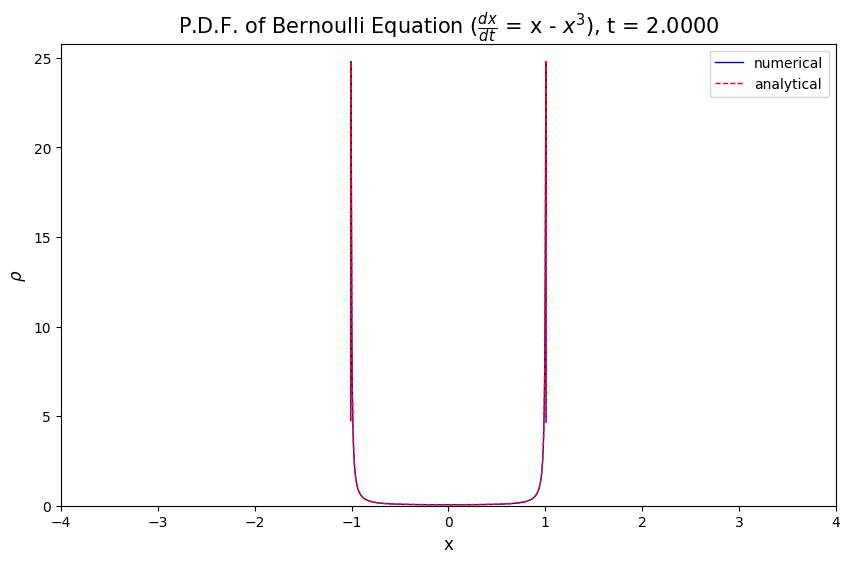

In [6]:
t_ani = t
h_ani = h
nt_ani = nt

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(np.linspace(-4, 4, 9))
ax.set_xlim([-4, 4])
ax.set_ylim([0, 2])
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$\rho$', fontsize=12)
ax.legend(loc='upper right', fontsize=10)

x_nume_ani = x_ini
rho_nume_ani = rho_ini[0, :]
state = {"ini_array": np.array([x_ini, rho_ini[0, :]])}

numerical_line, = ax.plot([], [], color='b', lw=1, label='numerical')
analytical_line, = ax.plot([], [], color='r', ls='--', lw=1, label='analytical')
ax.legend(loc='upper right', fontsize=10)
#plt.tight_layout()

def init():
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[0, :], rho_exact[0, :])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.4f' %t_ani[0], fontsize=15)
    return numerical_line, analytical_line

def update(frame):
    x_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[0, :]
    rho_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[1, :]
    state['ini_array'] = np.array([x_nume_ani, rho_nume_ani])
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[frame+1, :], rho_exact[frame+1, :])
    if np.amax(rho_nume_ani) >= 1:
        ax.set_ylim([0, np.amax(rho_nume_ani)+1])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.4f' %t_ani[frame+1], fontsize=15)
    return numerical_line, analytical_line

ani = animation.FuncAnimation(fig, update, frames=nt_ani-1, init_func=init, blit=True)

ani.save('Bernoulli_rho (dt=%.4f).mp4' %h_ani, fps=50, dpi=500)

C:\Users\kylec\AppData\Local\Temp\ipykernel_24284\2485724844.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=10)


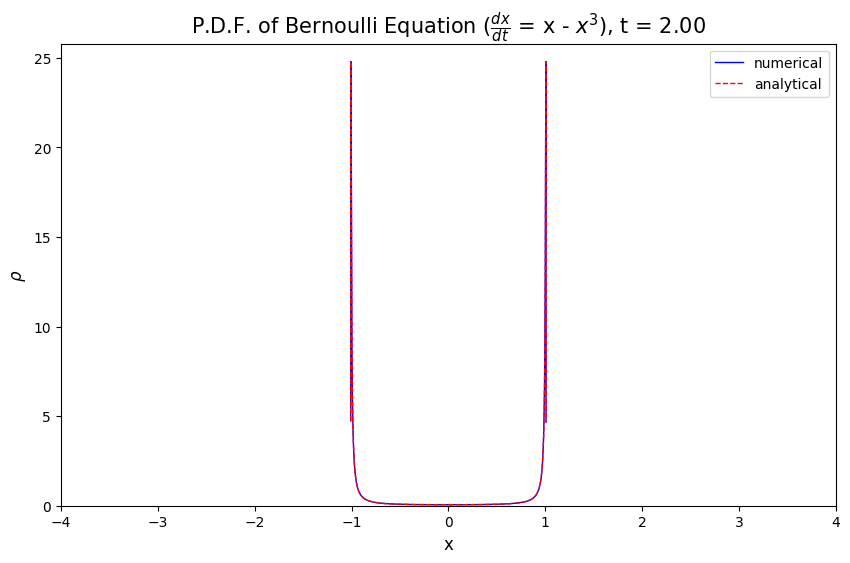

In [21]:
t_ani = np.linspace(0, 2, 101)
h_ani = t_ani[1] - t_ani[0]
nt_ani = t_ani.shape[0]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(np.linspace(-4, 4, 9))
ax.set_xlim([-4, 4])
ax.set_ylim([0, 2])
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$\rho$', fontsize=12)
ax.legend(loc='upper right', fontsize=10)

x_nume_ani = x_ini
rho_nume_ani = rho_ini[0, :]
state = {"ini_array": np.array([x_ini, rho_ini[0, :]])}

numerical_line, = ax.plot([], [], color='b', lw=1, label='numerical')
analytical_line, = ax.plot([], [], color='r', ls='--', lw=1, label='analytical')
ax.legend(loc='upper right', fontsize=10)
#plt.tight_layout()

def init():
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[0, :], rho_exact[0, :])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.2f' %t_ani[0], fontsize=15)
    return numerical_line, analytical_line

def update(frame):
    x_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[0, :]
    rho_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[1, :]
    state['ini_array'] = np.array([x_nume_ani, rho_nume_ani])
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[100*(frame+1), :], rho_exact[100*(frame+1), :])
    if np.amax(rho_nume_ani) >= 1:
        ax.set_ylim([0, np.amax(rho_nume_ani)+1])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.2f' %t_ani[frame+1], fontsize=15)
    return numerical_line, analytical_line

ani = animation.FuncAnimation(fig, update, frames=nt_ani-1, init_func=init, blit=True)

ani.save('Bernoulli_rho (dt=%.2f).mp4' %h_ani, fps=10, dpi=500)

C:\Users\kylec\AppData\Local\Temp\ipykernel_14168\808016560.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=10)


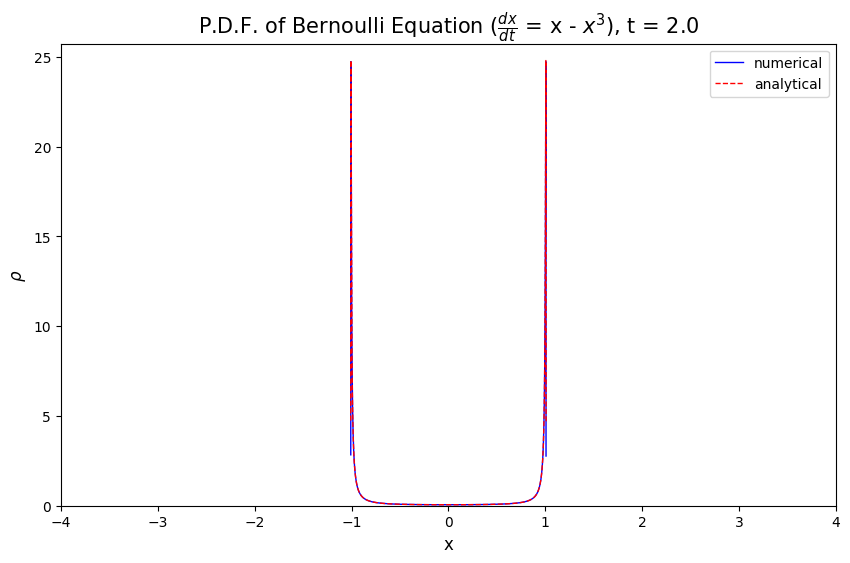

In [ ]:
t_ani = np.linspace(0, 2, 21)
h_ani = t_ani[1] - t_ani[0]
nt_ani = t_ani.shape[0]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(np.linspace(-4, 4, 9))
ax.set_xlim([-4, 4])
ax.set_ylim([0, 2])
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$\rho$', fontsize=12)
ax.legend(loc='upper right', fontsize=10)

x_nume_ani = x_ini
rho_nume_ani = rho_ini[0, :]
state = {"ini_array": np.array([x_ini, rho_ini[0, :]])}

numerical_line, = ax.plot([], [], color='b', lw=1, label='numerical')
analytical_line, = ax.plot([], [], color='r', ls='--', lw=1, label='analytical')
ax.legend(loc='upper right', fontsize=10)
#plt.tight_layout()

def init():
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[0, :], rho_exact[0, :])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.1f' %t_ani[0], fontsize=15)
    return numerical_line, analytical_line

def update(frame):
    x_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[0, :]
    rho_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[1, :]
    state['ini_array'] = np.array([x_nume_ani, rho_nume_ani])
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[500*(frame+1), :], rho_exact[500*(frame+1), :])
    if np.amax(rho_nume_ani) >= 1:
        ax.set_ylim([0, np.amax(rho_nume_ani)+1])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.1f' %t_ani[frame+1], fontsize=15)
    return numerical_line, analytical_line

ani = animation.FuncAnimation(fig, update, frames=nt_ani-1, init_func=init, blit=True)

ani.save('Bernoulli_rho (dt=%.1f).mp4' %h_ani, fps=2, dpi=500)

C:\Users\kylec\AppData\Local\Temp\ipykernel_14168\3685271669.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', fontsize=10)


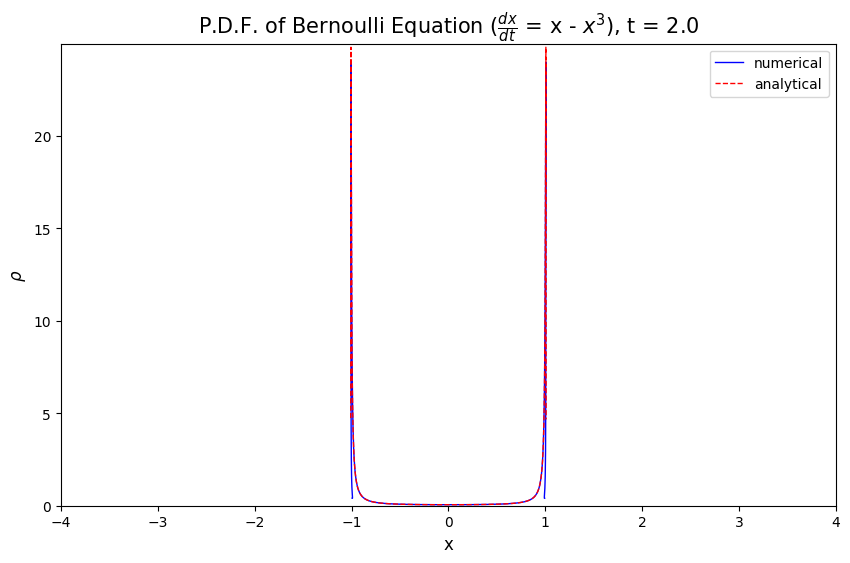

In [ ]:
t_ani = np.linspace(0, 2, 11)
h_ani = t_ani[1] - t_ani[0]
nt_ani = t_ani.shape[0]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(np.linspace(-4, 4, 9))
ax.set_xlim([-4, 4])
ax.set_ylim([0, 2])
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$\rho$', fontsize=12)
ax.legend(loc='upper right', fontsize=10)

x_nume_ani = x_ini
rho_nume_ani = rho_ini[0, :]
state = {"ini_array": np.array([x_ini, rho_ini[0, :]])}

numerical_line, = ax.plot([], [], color='b', lw=1, label='numerical')
analytical_line, = ax.plot([], [], color='r', ls='--', lw=1, label='analytical')
ax.legend(loc='upper right', fontsize=10)
#plt.tight_layout()

def init():
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[0, :], rho_exact[0, :])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.1f' %t_ani[0], fontsize=15)
    return numerical_line, analytical_line

def update(frame):
    x_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[0, :]
    rho_nume_ani = Solve_RK4(t_ani[frame:frame+2], state['ini_array'], func_ODEs, h_ani)[1, :]
    state['ini_array'] = np.array([x_nume_ani, rho_nume_ani])
    numerical_line.set_data(x_nume_ani, rho_nume_ani)
    analytical_line.set_data(x_exact[1000*(frame+1), :], rho_exact[1000*(frame+1), :])
    if np.amax(rho_nume_ani) >= 1:
        ax.set_ylim([0, np.amax(rho_nume_ani)+1])
    ax.set_title(r'P.D.F. of Bernoulli Equation ($\frac{dx}{dt}$ = x - $x^{3}$),'+' t = %.1f' %t_ani[frame+1], fontsize=15)
    return numerical_line, analytical_line

ani = animation.FuncAnimation(fig, update, frames=nt_ani-1, init_func=init, blit=True)

ani.save('Bernoulli_rho (dt=%.1f).mp4' %h_ani, fps=2, dpi=500)